In [1]:
!pip3 install newspaper3k 

     |████████████████████████████████| 215kB 3.4MB/s 
     |████████████████████████████████| 194kB 49.4MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 7.4MB 49.4MB/s 
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=9c1ef4339d843fc13b3a92270c57a9338dba43a4a01694458923a3ff1a5bfc86
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=20c44a418d1a65c665ca3c4b49278826cc4c98235db7562fec227137e72ee013
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=b314c2cf2d784dcfb2c3e5f339731fdc95e9e3f32e78f51a251b394571e3fccc
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da2

# Import Libraries

In [0]:
import os
import pandas as pd
import numpy as np
import os
import re
import sys
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from pandas_summary import DataFrameSummary
#from IPython.display import display



In [0]:


# Importing packages

import os
import pandas as pd
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline



In [0]:
from newspaper import Article 

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read data


In [0]:
df=pd.read_csv('tweet_data2.csv')
df1=pd.read_csv('tweet_data3.csv')
df3=df.append(df1)
df=df3

In [0]:
df.reset_index(inplace=True)

In [0]:
df.drop(['level_0'],axis=1,inplace=True)

In [11]:
df

,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name
0,1255085476387663872,CNN Breaking News,cnnbrk,168,The Olympics could be canceled if the Covid-19...,2020-04-28 16:58:43.353931,2020-04-28 10:44:30.000000,304,[],70319,NaN,Twitter Web App,None,None,None
1,1254887991631372289,CNN Breaking News,cnnbrk,196,Boeing says it will restart production of the ...,2020-04-28 16:58:43.353965,2020-04-27 21:39:46.000000,894,[],70319,NaN,TweetDeck,None,None,None
2,1254871163320311816,CNN Breaking News,cnnbrk,484,Texas Gov. Greg Abbott will end stay-home orde...,2020-04-28 16:58:43.353975,2020-04-27 20:32:54.000000,1312,[],70319,NaN,TweetDeck,None,None,None
3,1254853302023532544,CNN Breaking News,cnnbrk,154,The New York State Board of Elections canceled...,2020-04-28 16:58:43.353985,2020-04-27 19:21:55.000000,616,[],70319,NaN,TweetDeck,None,None,None
4,1254814454312775686,CNN Breaking News,cnnbrk,1735,The US Defense Department officially releases ...,2020-04-28 16:58:43.354060,2020-04-27 16:47:33.000000,4568,[],70319,NaN,TweetDeck,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1252457297948938240,ABC News,ABC,31,"""Every time the mail truck comes down the road...",2020-04-28 17:10:31.866930,2020-04-21 04:41:04.000000,169,[],299251,NaN,SocialFlow,None,None,None
1996,1252456628114411520,ABC News,ABC,60,"A nurse in Milan, Italy, wipes aways tears as ...",2020-04-28 17:10:31.866933,2020-04-21 04:38:24.000000,299,[],299251,NaN,SocialFlow,None,None,None
1997,1252452765734928384,ABC News,ABC,241,Reports of accidental poisonings from cleaners...,2020-04-28 17:10:31.866936,2020-04-21 04:23:03.000000,413,[],299251,NaN,SocialFlow,None,None,None
1998,1252451564389912576,ABC News,ABC,857,HOP TO IT: A kangaroo had the run of the city ...,2020-04-28 17:10:31.866940,2020-04-21 04:18:17.000000,3105,[],299251,NaN,SocialFlow,None,None,None


# Preprocessing data


New column of full tweet text

In [0]:
full_text=[]
for index,row in df.iterrows():
  if row['retweet_text']!='None':
    full_text.append(row['retweet_text'])
  else:
    full_text.append(row['text'])
    

In [0]:
df['full_text']=full_text

Time Difference between tweet creation and tweet mining

In [0]:
df['created_date']=pd.to_datetime(df['created_at'])
df['mined_date']=pd.to_datetime(df['mined_at'])
df['difference']=df['mined_date'] - df['created_date']
df['diff_seconds']=df['difference']/np.timedelta64(1,'s')
df['diff_in_min']=df['diff_seconds']/60

Extract Article URL from tweet text

In [0]:
url1=[]
for index,row in df.iterrows():
  a=re.search("(?P<url>https?://[^\s]+)", row['full_text'])
  if a:
    a=a.group("url")
  else:
    a=np.NaN
  url1.append(a)

In [0]:
df['URL']=url1

In [19]:
df['URL']

0       https://t.co/v9G5DJlnn1
1       https://t.co/uepjrf006a
2       https://t.co/SyxKnMkrX2
3       https://t.co/DiZpm2XO0e
4       https://t.co/B5bWmzbpJE
                 ...           
1995    https://t.co/XlKsnpp0IX
1996    https://t.co/AosClrJjn0
1997    https://t.co/lvASGWIweJ
1998    https://t.co/ngE6OmGShI
1999    https://t.co/N2R5i9rLX4
Name: URL, Length: 2000, dtype: object

Summary and word count of article

In [0]:
summary1=[]
word_count1=[]
for index in range(len(df)):
  #print(index)
  try:
    article=Article(df['URL'][index],language="en")
    article.download()
    article.parse()
    article.nlp()
    #text.append(article.text)
    summary1.append(article.summary)
    word_count1.append(len(article.text.split()))
  except:
    print('exception\n')
    #text.append(np.NaN)
    summary1.append(np.NaN)
    word_count1.append(np.NaN)


In [21]:
len(summary1)

2000

In [0]:
df['Summary']=summary1
df['Word_count']=word_count1

In [159]:
df['full_text'][0]

'The Olympics could be canceled if the Covid-19 pandemic continues into next year, the Tokyo 2020 president says\nhttps://t.co/v9G5DJlnn1 https://t.co/zBZOAaPP1B'

In [160]:
df['Summary'][0]

'(CNN) The Olympics could be canceled if the Covid-19 pandemic continues into next year, according to the Tokyo 2020 president.\nThe Games are scheduled to start from July 23, 2021, having already been postponed a year amid the virus outbreak.\nThis would be the strongest statement on canceling the Olympics and Paralympics from organizers, who have routinely said they are focusing on plans to hold the Games.\nAsked in an interview with Nikkan Sports about another postponement of the event if the virus is ongoing, Tokyo 2020 President Yoshiro Mori said: "No.\n"The Olympics were canceled in the past for problems like war.'

In [161]:
df['Word_count'][0]

118.0

Sentiment Analysis of news article to find its emotional polarity.
(Between -1 to 1)

In [0]:
polarity=[]
polar=[]
sia=SentimentIntensityAnalyzer()
for index in range(len(df)):
  #print(index)
  try:
    a=df['Summary'][index]
    b=sia.polarity_scores(a)['compound']
    polarity.append(b)
    if b<0:
      polar.append(0)
    else:
      polar.append(1)
  except:
    print('except')
    polarity.append(0)
    polar.append(0)

In [0]:
df['Polarity']=polarity
df['Sentiment']=polar

In [162]:
df['Polarity'][0]

-0.4588

Classify Polarity into 5 Classes

In [0]:

df['senti']=np.NaN
df['senti'][df['Polarity']<-0.5]=-2
df['senti'][(df['Polarity']>=-0.5) & (df['Polarity']<0)]=-1
df['senti'][(df['Polarity']>0) &  (df['Polarity']<=0.5)]=1
df['senti'][(df['Polarity']>0.5) & (df['Polarity']<=1)]=2
df['senti'][df['Polarity']==0]=0

In [0]:
a1=df['retweet_count']/df['diff_in_min']
df['viral']=a1

In [45]:
df.head()

,tweet_id,name,screen_name,retweet_count,text,mined_at,created_at,favourite_count,hashtags,status_count,location,source_device,retweet_text,quote_text,quote_screen_name,full_text,created_date,mined_date,difference,diff_seconds,diff_in_min,URL,Summary,Word_count,senti,Polarity,Sentiment,viral
0,1255085476387663872,CNN Breaking News,cnnbrk,168,The Olympics could be canceled if the Covid-19...,2020-04-28 16:58:43.353931,2020-04-28 10:44:30.000000,304,[],70319,NaN,Twitter Web App,None,None,None,The Olympics could be canceled if the Covid-19...,2020-04-28 10:44:30,2020-04-28 16:58:43.353931,0 days 06:14:13.353931,22453.353931,374.222566,https://t.co/v9G5DJlnn1,(CNN) The Olympics could be canceled if the Co...,118.0,-1.0,-0.4588,0,0.448931
1,1254887991631372289,CNN Breaking News,cnnbrk,196,Boeing says it will restart production of the ...,2020-04-28 16:58:43.353965,2020-04-27 21:39:46.000000,894,[],70319,NaN,TweetDeck,None,None,None,Boeing says it will restart production of the ...,2020-04-27 21:39:46,2020-04-28 16:58:43.353965,0 days 19:18:57.353965,69537.353965,1158.955899,https://t.co/uepjrf006a,Boeing has rolled out the first 787-10 Dreamli...,179.0,0.0,0.0000,1,0.169118
2,1254871163320311816,CNN Breaking News,cnnbrk,484,Texas Gov. Greg Abbott will end stay-home orde...,2020-04-28 16:58:43.353975,2020-04-27 20:32:54.000000,1312,[],70319,NaN,TweetDeck,None,None,None,Texas Gov. Greg Abbott will end stay-home orde...,2020-04-27 20:32:54,2020-04-28 16:58:43.353975,0 days 20:25:49.353975,73549.353975,1225.822566,https://t.co/SyxKnMkrX2,Greg Abbott said Monday he will allow his stay...,178.0,2.0,0.9072,1,0.394837
3,1254853302023532544,CNN Breaking News,cnnbrk,154,The New York State Board of Elections canceled...,2020-04-28 16:58:43.353985,2020-04-27 19:21:55.000000,616,[],70319,NaN,TweetDeck,None,None,None,The New York State Board of Elections canceled...,2020-04-27 19:21:55,2020-04-28 16:58:43.353985,0 days 21:36:48.353985,77808.353985,1296.805900,https://t.co/DiZpm2XO0e,Angela Weiss/AFP/Getty ImagesThe New York Stat...,357.0,1.0,0.3182,1,0.118753
4,1254814454312775686,CNN Breaking News,cnnbrk,1735,The US Defense Department officially releases ...,2020-04-28 16:58:43.354060,2020-04-27 16:47:33.000000,4568,[],70319,NaN,TweetDeck,None,None,None,The US Defense Department officially releases ...,2020-04-27 16:47:33,2020-04-28 16:58:43.354060,1 days 00:11:10.354060,87070.354060,1451.172568,https://t.co/B5bWmzbpJE,Washington (CNN) The Pentagon has officially r...,192.0,0.0,0.0000,1,1.195585


In [63]:
df.shape


(3944, 16)

In [0]:
df.reset_index(inplace=True)


In [0]:
df.drop(['level_0'],axis=1,inplace=True)

In [73]:
df

,screen_name,retweet_count,full_text,favourite_count,URL,Summary,Word_count,Polarity,Sentiment,created_date,mined_date,difference,viral,diff_in_min,diff_seconds,senti
0,cnnbrk,168,The Olympics could be canceled if the Covid-19...,304,https://t.co/v9G5DJlnn1,(CNN) The Olympics could be canceled if the Co...,118.0,-0.4588,0,2020-04-28 10:44:30,2020-04-28 16:58:43.353931,0 days 06:14:13.353931,0.448931,374.222566,2.245335e+04,-1.0
1,cnnbrk,196,Boeing says it will restart production of the ...,894,https://t.co/uepjrf006a,Boeing has rolled out the first 787-10 Dreamli...,179.0,0.0000,1,2020-04-27 21:39:46,2020-04-28 16:58:43.353965,0 days 19:18:57.353965,0.169118,1158.955899,6.953735e+04,0.0
2,cnnbrk,484,Texas Gov. Greg Abbott will end stay-home orde...,1312,https://t.co/SyxKnMkrX2,Greg Abbott said Monday he will allow his stay...,178.0,0.9072,1,2020-04-27 20:32:54,2020-04-28 16:58:43.353975,0 days 20:25:49.353975,0.394837,1225.822566,7.354935e+04,2.0
3,cnnbrk,154,The New York State Board of Elections canceled...,616,https://t.co/DiZpm2XO0e,Angela Weiss/AFP/Getty ImagesThe New York Stat...,357.0,0.3182,1,2020-04-27 19:21:55,2020-04-28 16:58:43.353985,0 days 21:36:48.353985,0.118753,1296.805900,7.780835e+04,1.0
4,cnnbrk,1735,The US Defense Department officially releases ...,4568,https://t.co/B5bWmzbpJE,Washington (CNN) The Pentagon has officially r...,192.0,0.0000,1,2020-04-27 16:47:33,2020-04-28 16:58:43.354060,1 days 00:11:10.354060,1.195585,1451.172568,8.707035e+04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,BBCWorld,788,Five shot dead in Russia for 'talking loudly' ...,1840,https://t.co/JgxAaBHdQ3,Image copyright Getty Images Image caption Pol...,140.0,-0.9524,0,2020-04-05 21:02:18.000000,2020-04-28 00:01:35.818286,22 days 02:59:17.818286000,0.024734,31859.296971,1.911558e+06,-2.0
3940,BBCWorld,313,Somali outrage at rape of girls aged three and...,794,https://t.co/ZO7Vz9W7X6,Image copyright AFP Image caption Reports of r...,195.0,-0.9766,0,2020-04-05 20:39:49.000000,2020-04-28 00:01:35.818293,22 days 03:21:46.818293000,0.009818,31881.780305,1.912907e+06,-2.0
3941,BBCWorld,260,Malawi president and government ministers take...,1124,https://t.co/2t9EUuY0Pg,Image copyright Reuters Image caption Peter Mu...,301.0,-0.6652,0,2020-04-05 20:30:23.000000,2020-04-28 00:01:35.818300,22 days 03:31:12.818300000,0.008153,31891.213638,1.913473e+06,-2.0
3942,BBCWorld,247,Another 674 people have died in Spain in the l...,688,https://t.co/y6K6Qm6RAw,"“In the years to come”, she hopes everyone wil...",317.0,0.7306,1,2020-04-05 20:24:50.000000,2020-04-28 00:01:35.818304,22 days 03:36:45.818304000,0.007744,31896.763638,1.913806e+06,2.0


Outlier Detection and processing


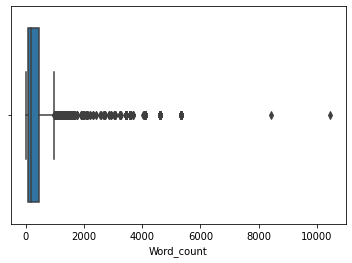

In [74]:
sns.boxplot(x=df['Word_count'])

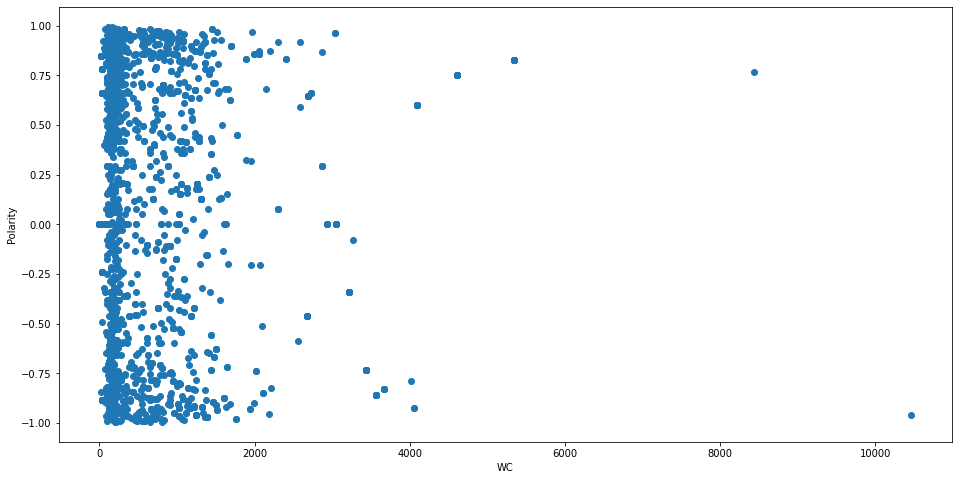

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Word_count'],df1['Polarity'])
ax.set_xlabel('WC')
ax.set_ylabel('Polarity')
plt.show()



In [77]:
df['Word_count'].mode()

0    39.0
dtype: float64

In [0]:
Q1 = df['Word_count'].quantile(0.25)
Q3 = df['Word_count'].quantile(0.75)
IQR = Q3 - Q1
print(Q3)
#456

In [0]:
df=df[df.Word_count<=500]

In [97]:
df.shape

(3047, 16)

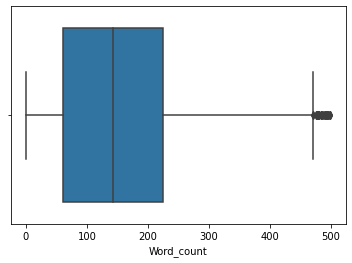

In [99]:
sns.boxplot(x=df['Word_count'])

# Model Planning

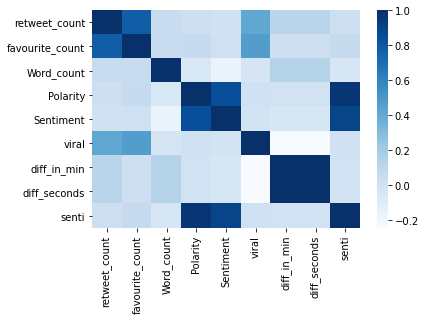

In [98]:
sns.heatmap(df.corr(), cmap="Blues")

In [115]:
df.describe()

,retweet_count,favourite_count,Word_count,Polarity,Sentiment,viral,diff_in_min,diff_seconds,senti
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000
mean,304.735478,803.609124,160.812274,0.067815,0.616016,0.047011,21937.279555,1.316237e+06,0.193961
std,546.292596,1415.648245,118.102155,0.633010,0.486434,0.103215,28681.726871,1.720904e+06,1.615378
min,5.000000,0.000000,0.000000,-0.994200,0.000000,0.000155,331.215325,1.987292e+04,-2.000000
25%,81.000000,177.000000,60.000000,-0.523300,0.000000,0.006008,5137.774190,3.082665e+05,-2.000000
50%,154.000000,393.000000,143.000000,0.000000,1.000000,0.014016,8595.018333,5.157011e+05,0.000000
75%,313.000000,855.000000,224.000000,0.670500,1.000000,0.039304,25814.347455,1.548861e+06,2.000000
max,11008.000000,20455.000000,499.000000,0.995000,1.000000,1.519609,116117.117319,6.967027e+06,2.000000


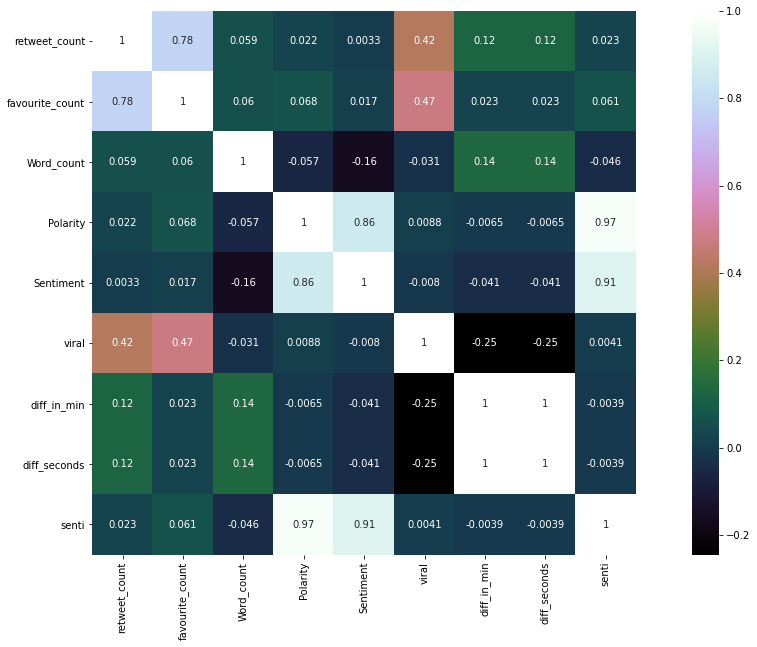

In [116]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# Model Building

In [0]:
X_df=df.loc[:,['Word_count','favourite_count','diff_in_min','senti','Polarity']]
y_df=df.loc[:,['retweet_count']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

Random forest regressor

In [0]:
clf = RandomForestRegressor(n_estimators=1000)
clf.fit(X_train, y_train.values.ravel())
y_pred=clf.predict(X_test)


In [0]:
RF=clf.score(X_test,y_test)

In [122]:
print("Accuracy:",clf.score(X_test,y_test))

Accuracy: 0.6894947174390328


In [123]:
feature_imp = pd.Series(clf.feature_importances_,index=X_df.columns).sort_values(ascending=False)
feature_imp

favourite_count    0.677131
diff_in_min        0.140998
Polarity           0.106122
Word_count         0.068229
senti              0.007520
dtype: float64

No handles with labels found to put in legend.


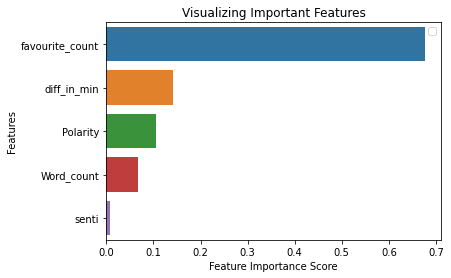

In [124]:

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


Ridge Regression

In [0]:
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [0]:
Ridge=model.score(X_test,y_test)

In [130]:
print("Accuracy:",model.score(X_test,y_test))

Accuracy: 0.7004272266356009


KNN

In [0]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_test)

In [0]:
knn1=knn.score(X_test,y_test)

In [136]:
print("Accuracy:",knn.score(X_test,y_test))

Accuracy: 0.5157716435824147


Baysian Ridge Regressor

In [0]:
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train.values.ravel())
y1_reg=reg.predict(X_train)

In [0]:
Bay_Ridge=reg.score(X_test,y_test)

In [144]:
print("Accuracy:",reg.score(X_test,y_test))

Accuracy: 0.7028537962818087


Decision Tree Regressor

In [0]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y1_dec=dec.predict(X_test)

In [0]:
DTR=dec.score(X_test,y_test)

In [141]:
print("Accuracy:",dec.score(X_test,y_test))

Accuracy: 0.3842341172815359


In [156]:

accuracy=[RF,Ridge,knn1,Bay_Ridge,DTR]
col={'Accuracy':accuracy}
models=['Random Forest Regressor','Ridge Regression','Knn','Bayesian Regression','Decision Tree']
acc=DataFrame(data=col,index=models)
acc

,Accuracy
Random Forest Regressor,0.689495
Ridge Regression,0.700427
Knn,0.515772
Bayesian Regression,0.702854
Decision Tree,0.384234


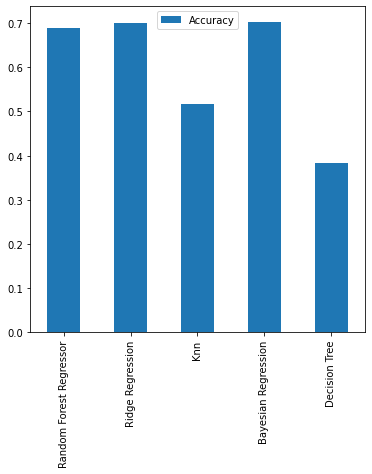

In [158]:
acc.plot(kind='bar')

#Visualizations

In [0]:
website=df['screen_name'].unique()
avg_virality=[]
avg_tweets=[]
number=[]
for site in website:
  a=df['viral'].loc[df['screen_name']==site].mean()
  b=len(df.loc[df['screen_name']==site])
  avg_virality.append(a)
  number.append(b)

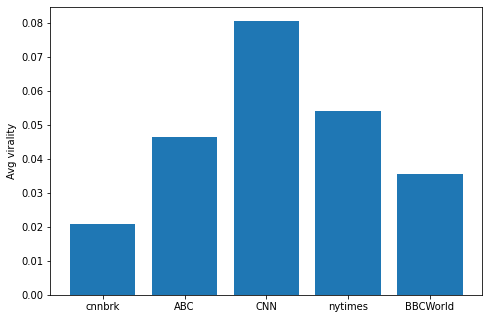

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(website,avg_virality)
ax.set_ylabel('Avg virality')
plt.show()

In [0]:
sentiment1=df['senti'].unique()
avg_virality1=[]
for sentiment in sentiment1:
  a=df['viral'].loc[df['senti']==sentiment].mean()
  avg_virality1.append(a)

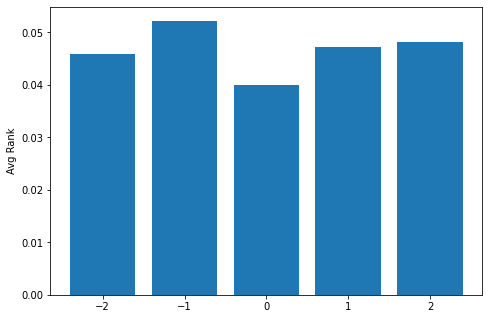

In [112]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentiment1,avg_virality1)
ax.set_ylabel('Avg Rank')
plt.show()

In [0]:
df.to_csv('final123.csv')